# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=iqaluit
Processing Record 2 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ushuaia
Processing Record 3 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaini
Processing Record 4 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yellowknife
Processing Record 5 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=butaritari
Processing Record 6 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kapaa
Processing Record 7 of Set 1 | yam

Processing Record 3 of Set 2 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=russell
Processing Record 4 of Set 2 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=geraldton
Processing Record 5 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bluff
Processing Record 6 of Set 2 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=longyearbyen
Processing Record 7 of Set 2 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-pierre
Processing Record 8 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=barrow
Processing Record 9 of Set 2 | pochutla
http://api.openweathermap.org/data/2.5/wea

Processing Record 6 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chokurdakh
Processing Record 7 of Set 3 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rocha
Processing Record 8 of Set 3 | bhadrachalam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bhadrachalam
Processing Record 9 of Set 3 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hithadhoo
Processing Record 10 of Set 3 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jamestown
Processing Record 11 of Set 3 | carmo do rio verde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=carmo%20do%20rio%20verde
Processing Record 12 of Set 3 | general higinio mo

Processing Record 8 of Set 4 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tilichiki
Processing Record 9 of Set 4 | kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kalianget
Processing Record 10 of Set 4 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bengkulu
City not found. Skipping...
Processing Record 11 of Set 4 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tumannyy
City not found. Skipping...
Processing Record 12 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=thompson
Processing Record 13 of Set 4 | sovkhoznyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sovkhoznyy
Processing Record 14

Processing Record 11 of Set 5 | villaviciosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=villaviciosa
Processing Record 12 of Set 5 | malm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=malm
Processing Record 13 of Set 5 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=padang
Processing Record 14 of Set 5 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=codrington
Processing Record 15 of Set 5 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=goderich
Processing Record 16 of Set 5 | brilon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=brilon
Processing Record 17 of Set 5 | kontagora
http://api.openweathermap.org/data/2.5/weath

Processing Record 13 of Set 6 | choix
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=choix
Processing Record 14 of Set 6 | timaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=timaru
Processing Record 15 of Set 6 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marawi
Processing Record 16 of Set 6 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=quatre%20cocos
Processing Record 17 of Set 6 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20policarpo
Processing Record 18 of Set 6 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mar%20del%20plata
Processing Record 19 of Set 6 | lavrentiya
http://api.openwe

Processing Record 16 of Set 7 | stuhr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=stuhr
Processing Record 17 of Set 7 | macara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=macara
City not found. Skipping...
Processing Record 18 of Set 7 | kismayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kismayo
City not found. Skipping...
Processing Record 19 of Set 7 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nouadhibou
Processing Record 20 of Set 7 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=alofi
Processing Record 21 of Set 7 | jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jumla
Processing Record 22 of Set 7 | alice springs


Processing Record 19 of Set 8 | rincon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rincon
Processing Record 20 of Set 8 | zherdevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zherdevka
Processing Record 21 of Set 8 | faratsiho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=faratsiho
Processing Record 22 of Set 8 | yirol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yirol
City not found. Skipping...
Processing Record 23 of Set 8 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aykhal
Processing Record 24 of Set 8 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=avera
Processing Record 25 of Set 8 | muravlenko
http://api.openweathermap.o

Processing Record 22 of Set 9 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=salalah
Processing Record 23 of Set 9 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tocopilla
Processing Record 24 of Set 9 | kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kushima
Processing Record 25 of Set 9 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cockburn%20town
Processing Record 26 of Set 9 | calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=calama
Processing Record 27 of Set 9 | kuala terengganu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kuala%20terengganu
Processing Record 28 of Set 9 | makakilo city
http://api.o

Processing Record 25 of Set 10 | ewa beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ewa%20beach
Processing Record 26 of Set 10 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chapais
Processing Record 27 of Set 10 | lawrenceburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lawrenceburg
Processing Record 28 of Set 10 | smirnykh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=smirnykh
Processing Record 29 of Set 10 | sira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sira
Processing Record 30 of Set 10 | shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shirokiy
Processing Record 31 of Set 10 | serowe
http://api.openweathermap.org/data

Processing Record 27 of Set 11 | batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=batticaloa
Processing Record 28 of Set 11 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fairbanks
Processing Record 29 of Set 11 | pingxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pingxiang
Processing Record 30 of Set 11 | aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=aden
Processing Record 31 of Set 11 | kinablangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kinablangan
Processing Record 32 of Set 11 | rumboci
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rumboci
Processing Record 33 of Set 11 | ugoofaaru
http://api.openweathermap.org

Processing Record 30 of Set 12 | minsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=minsk
Processing Record 31 of Set 12 | tangzhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tangzhai
Processing Record 32 of Set 12 | menongue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=menongue
Processing Record 33 of Set 12 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=marzuq
Processing Record 34 of Set 12 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shimoda
Processing Record 35 of Set 12 | utevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=utevka
Processing Record 36 of Set 12 | dalby
http://api.openweathermap.org/data/2.5/weather?units=

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,iqaluit,20,CA,1537862400,74,63.75,-68.52,33.80,4.70
1,ushuaia,75,AR,1537862400,55,-54.81,-68.31,35.60,13.87
2,vaini,56,IN,1537865287,64,15.34,74.49,84.58,3.87
3,yellowknife,5,CA,1537862400,92,62.45,-114.38,30.20,6.93
4,butaritari,48,KI,1537865288,100,3.07,172.79,84.94,9.13


## Latitude vs Temperature Plot

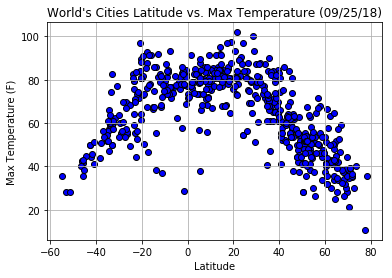

In [34]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps, color = 'blue',
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
plt.title("World's Cities Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

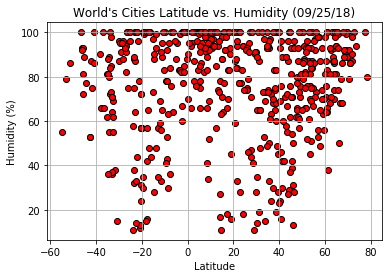

In [35]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity, color = "red",
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
plt.title("World's Cities Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

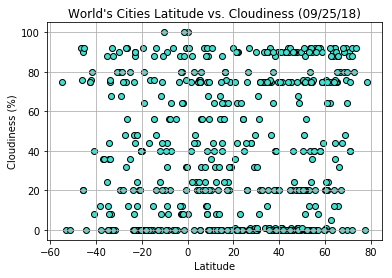

In [36]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness, color ="turquoise",
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
plt.title("World's Cities Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

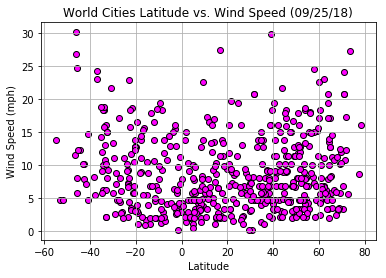

In [52]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed, color = "magenta",
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
plt.title("World Cities Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

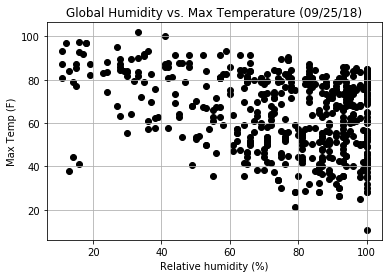

In [43]:
# Build the scatter plots for each city types
plt.scatter(humidity,
            max_temps, color = "black",
          
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
#plt.title("temperature vs humidity" % time.strftime("%x"))
plt.title("Global Humidity vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Relative humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

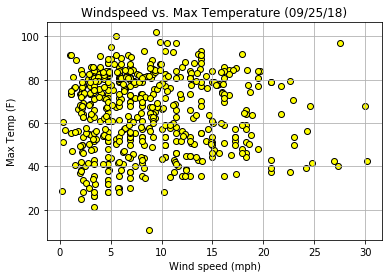

In [49]:
# Build the scatter plots for each city types
plt.scatter(wind_speed,
            max_temps, color = "yellow",
          
            edgecolor="black", linewidths=1, marker="o", 
            label="Cities")

# Incorporate the other graph properties
#plt.title("temperature vs humidity" % time.strftime("%x"))
plt.title("Windspeed vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Wind speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()